# How to update graph state from nodes

This guide demonstrates how to define and update state in LangGraph. We will demonstrate:

1.  How to use state to define a graph's schema
2.  How to use reducers to control how state updates are processed.

We will use messages in our examples. This represents a versatile formulation of state for many LLM applications. See our concepts page for more detail.

## Setup

In [12]:
from dotenv import load_dotenv
load_dotenv()

True

## Example graph

### Define State
State in LangGraph can be a TypedDict, Pydantic model, or dataclass. Below we will use TypedDict. See this guide for detail on using Pydantic.
By default, graphs will have the same input and output schema, and the state determines that schema. See this guide for how to define distinct input and output schemas.
Let's consider a simple example:

In [13]:
from langchain_core.messages import AnyMessage
from typing_extensions import TypedDict


class State(TypedDict):
    messages: list[AnyMessage]
    extra_field: int

This state tracks a list of message objects, as well as an extra integer field.

### Define graph structure

Let's build an example graph with a single node. Our node is just a Python function that reads our graph's state and makes updates to it. The first argument to this function will always be the state:

In [14]:
from langchain_core.messages import AIMessage


def node(state: State):
    messages = state["messages"]
    new_message = AIMessage("Hello!")

    return {"messages": messages + [new_message], "extra_field": 10}

# This node simply appends a message to our message list, and populates an extra field.

Let's next define a simple graph containing this node. We use StateGraph to define a graph that operates on this state. We then use add_node populate our graph.

In [15]:
from langgraph.graph import StateGraph

graph_builder = StateGraph(State)
graph_builder.add_node(node)
graph_builder.set_entry_point("node")
graph = graph_builder.compile()

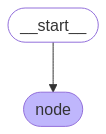

In [16]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

## Use graph

In [20]:
from langchain_core.messages import HumanMessage

result = graph.invoke({"messages": [HumanMessage("Hi")]})
result

{'messages': [HumanMessage(content='Hi', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello!', additional_kwargs={}, response_metadata={})],
 'extra_field': 10}

Note that:

1.  We kicked off invocation by updating a single key of the state.
2.  We receive the entire state in the invocation result.


For convenience, we frequently inspect the content of message objects via pretty-print:

In [18]:
for message in result["messages"]:
    message.pretty_print()

================================ Human Message =================================

Hi
================================== Ai Message ==================================

Hello!
